### Import required packages


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")


### Loading Data

In [2]:
sal = pd.read_csv('salary.csv')

### Missing Values

In [3]:
sal.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

* Our target variable (salary) has one missing value.

In [4]:
sal['salary'].fillna(sal['salary'].mean(),inplace = True)

sal = sal.drop_duplicates()

* Filling in missing values (w/ mean) and dropping duplicates

### Splitting Data

In [5]:
y = sal.salary
x = sal
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [6]:
data_corr = x_train.corr().iloc[:,0].sort_values()
data_corr

Field         -0.503231
yearsabs      -0.089951
degree         0.031467
exprior        0.126978
otherqual      0.195508
male           0.345277
market         0.396942
yearsworked    0.606048
yearsrank      0.613583
position       0.711832
salary         1.000000
Name: salary, dtype: float64

In [7]:
strong_data = data_corr[abs(data_corr) > 0.45].sort_values(ascending=False)


In [8]:
sal_data = x_train[['salary','yearsworked', 'yearsrank','position','Field']]

In [9]:
sal_data.describe()

,salary,yearsworked,yearsrank,position,Field
count,359.000000,359.000000,359.000000,359.000000,359.000000
mean,51098.340072,12.718663,7.153203,2.128134,2.481894
std,12930.640561,9.474250,6.492921,0.812104,1.108162
min,29000.000000,0.000000,0.000000,1.000000,1.000000
25%,40033.000000,4.000000,2.000000,1.000000,2.000000
50%,49768.000000,11.000000,5.000000,2.000000,2.000000
75%,60703.433595,21.000000,12.000000,3.000000,3.000000
max,96156.000000,41.000000,28.000000,3.000000,4.000000


### Histograms

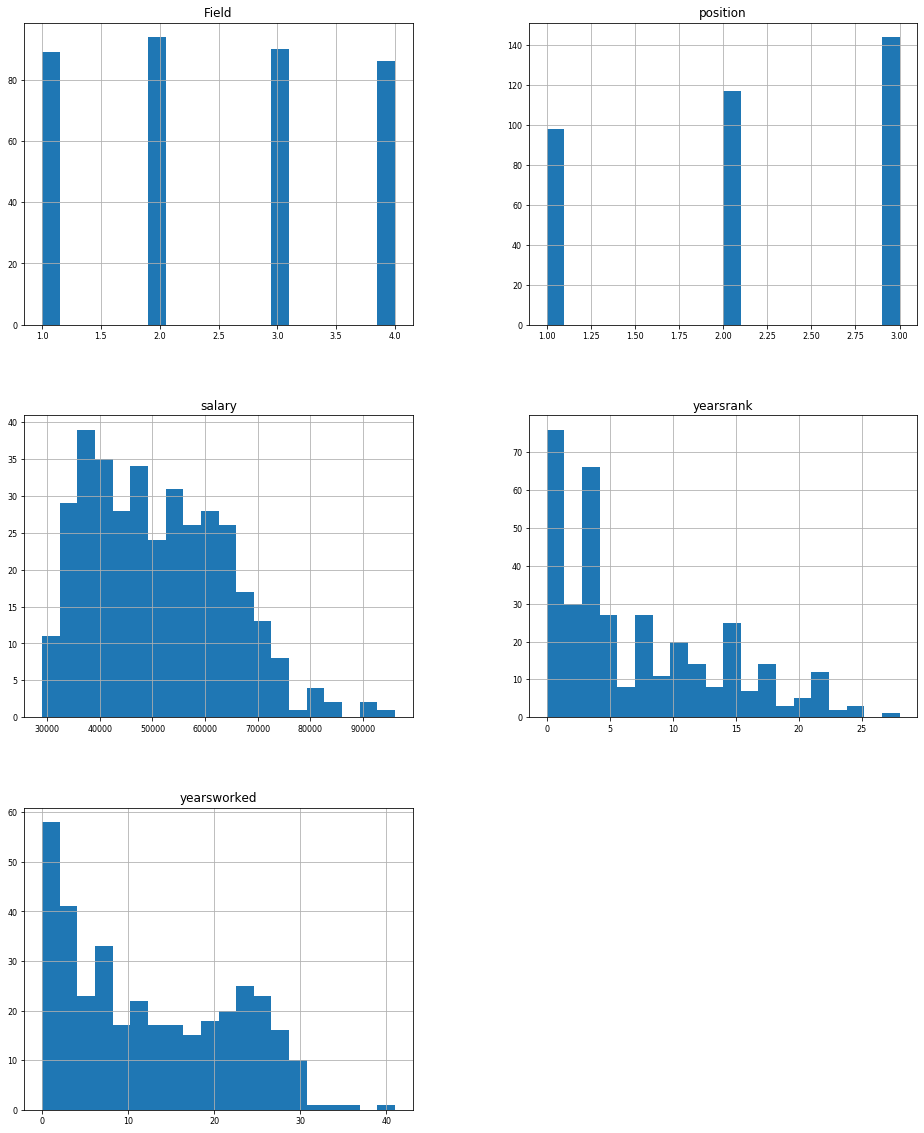

In [10]:
sal_data.hist(figsize=(16, 20),bins=20, xlabelsize=8, ylabelsize=8)
plt.show()

### Scatter Matrix

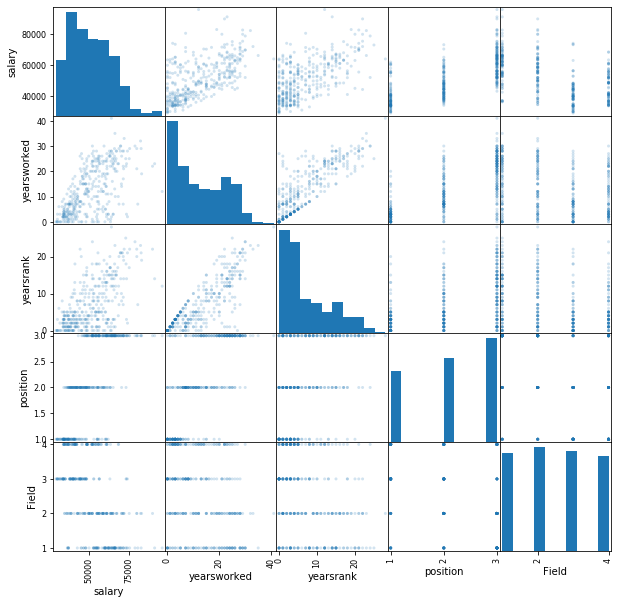

In [11]:
scatter_matrix(sal_data, alpha=0.2, figsize=(10, 10))
plt.show()

### Transforming Data 

In [12]:
pos = {1:'Engineering', 2:'Finance', 3:'Human Resources', 4:'Marketing'}
sal['Field'] = sal.Field.map(pos)
rank={1:'Junior', 2:'Manager', 3:'Executive'}
sal['position']=sal.position.map(rank)
sal = pd.get_dummies(sal, prefix_sep='_', drop_first=True)


In [13]:
pos = {1:'Engineering', 2:'Finance', 3:'Human Resources', 4:'Marketing'}
x_train['Field'] = x_train.Field.map(pos)
rank={1:'Junior', 2:'Manager', 3:'Executive'}
x_train['position']=x_train.position.map(rank)


In [14]:
x_train1 = pd.get_dummies(x_train, prefix_sep='_', drop_first=True)

In [15]:
features = x_train1[['salary','yearsworked','yearsrank','market','position_Junior','position_Manager','Field_Finance','Field_Marketing','Field_Human Resources']]

In [16]:
features_corr = features.corr()
features_corr.style.background_gradient(cmap = 'Greys')

,salary,yearsworked,yearsrank,market,position_Junior,position_Manager,Field_Finance,Field_Marketing,Field_Human Resources
salary,1,0.606048,0.613583,0.396942,-0.54014,-0.204862,0.211728,-0.221691,-0.422352
yearsworked,0.606048,1,0.835483,-0.0652922,-0.60103,-0.0848521,0.152988,-0.126791,-0.249087
yearsrank,0.613583,0.835483,1,-0.0166195,-0.376108,-0.0989205,0.182342,-0.141094,-0.262462
market,0.396942,-0.0652922,-0.0166195,1,0.0175183,-0.031137,0.116448,-0.0525811,-0.226441
position_Junior,-0.54014,-0.60103,-0.376108,0.0175183,1,-0.426067,-0.180059,0.13952,0.208201
position_Manager,-0.204862,-0.0848521,-0.0989205,-0.031137,-0.426067,1,0.059004,-0.0282358,0.118862
Field_Finance,0.211728,0.152988,0.182342,0.116448,-0.180059,0.059004,1,-0.334279,-0.344498
Field_Marketing,-0.221691,-0.126791,-0.141094,-0.0525811,0.13952,-0.0282358,-0.334279,1,-0.324648
Field_Human Resources,-0.422352,-0.249087,-0.262462,-0.226441,0.208201,0.118862,-0.344498,-0.324648,1


In [17]:
model= smf.ols(formula='salary ~ yearsworked + market + yearsrank', data=x_train).fit()
model.params

Intercept       4777.049337
yearsworked      521.377738
market         37391.477090
yearsrank        600.462190
dtype: float64

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     167.5
Date:                Mon, 30 Mar 2020   Prob (F-statistic):           1.22e-67
Time:                        12:26:29   Log-Likelihood:                -3749.4
No. Observations:                 359   AIC:                             7507.
Df Residuals:                     355   BIC:                             7522.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4777.0493   2977.541      1.604      0.110   -1078.788    1.06e+04
yearsworked   521.3777     85.193      6.120      0.000     353.832     688.924
market       3.739e+04   3004.836     12.444      0.000    3.15e+04    4.33e+04
yearsrank     600.4622    124.062      4.840      0.000     356.472     844.452
==============================================================================
Omnibus:                       64.200   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.971
Skew:                           1.004   Prob(JB):                     1.08e-25
Kurtosis:                       4.913   Cond. No.                         175.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Predictions

In [19]:
pred = model.predict(x_train)
